In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('NFLX.csv')

In [3]:
print(data.head());

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [25]:
X=data[['Open','High','Low']];
#  'Close' ,'Volume' # Ignoring these features because with these features my model becomes overfit
Y=data["Adj Close"];

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

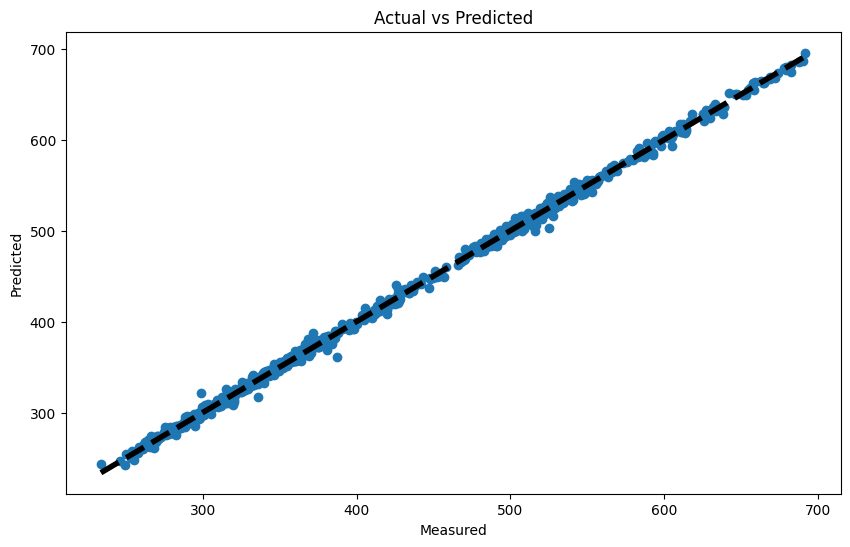

In [28]:
import matplotlib.pyplot as plt

Y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [29]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse) 


Mean Squared Error: 15.868083279786656


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=10)
print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 15.343481890280419
